<a href="https://colab.research.google.com/github/pratiksha199927/Heart_disease_Prediction/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 # Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1zSdaQfs50PmrD8X5Q6mT7N-z-HNbEzS0'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv') 


Importing important libraries like pd for importing dataset,numpy for arithmetic operations and matplotlib for data vishalization using bar char,histogram 



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.config', 'data.csv', 'adc.json', 'sample_data']


In [0]:
data= pd.read_csv('data.csv') 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [0]:
data.shape

(1025, 14)

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [0]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**In our dataset we don't have missing values** 

**Exploratory Data Analysis (EDA)**

In [0]:
y = data["target"]


1    526
0    499
Name: target, dtype: int64


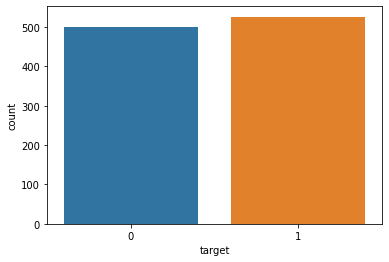

In [0]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)


In [0]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))


Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
Analysing the 'Sex' feature


In [0]:
data["sex"].unique()


array([1, 0])

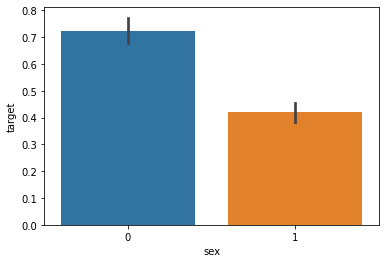

In [0]:
sns.barplot(data["sex"],y)


We notice, that females are more likely to have heart problems than males¶


Analysing the 'Chest Pain Type' feature


In [0]:
data["cp"].unique()


array([0, 1, 2, 3])

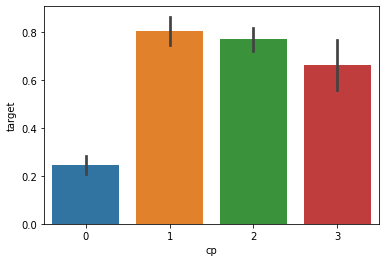

In [0]:
sns.barplot(data["cp"],y)


We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems¶


Analysing the FBS feature


In [0]:
data["fbs"].describe()


count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [0]:
data["fbs"].unique()


array([0, 1])

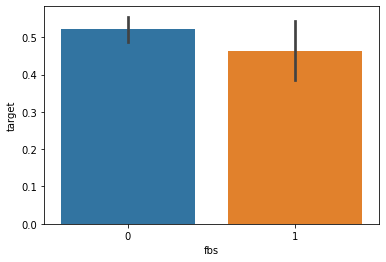

In [0]:
sns.barplot(data["fbs"],y)


Analysing the restecg feature


In [0]:
data["restecg"].unique()


array([1, 0, 2])

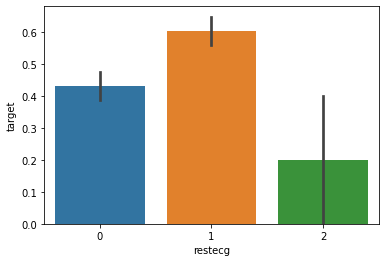

In [0]:
sns.barplot(data["restecg"],y)


We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'


Analysing the 'exang' feature


In [0]:
data["exang"].unique()


array([0, 1])

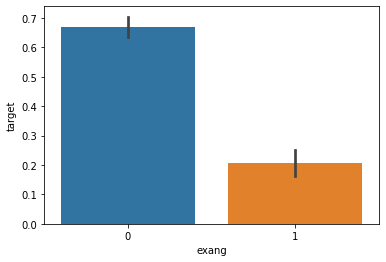

In [0]:
sns.barplot(data["exang"],y)


People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems


Analysing the Slope feature


In [0]:
data["slope"].unique()


array([2, 0, 1])

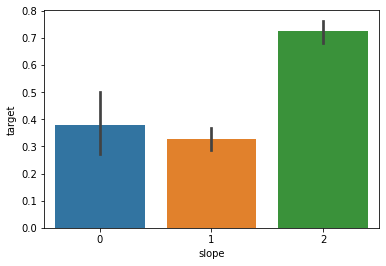

In [0]:
sns.barplot(data["slope"],y)


We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'


Analysing the 'ca' feature


In [0]:
data["ca"].unique()


array([2, 0, 1, 3, 4])

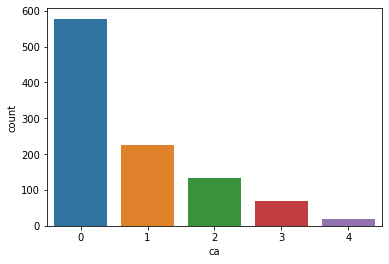

In [0]:
sns.countplot(data["ca"])


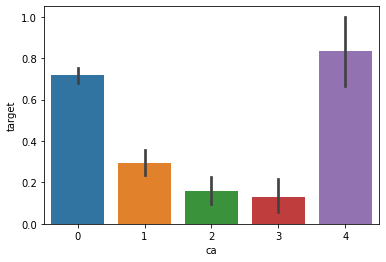

In [0]:
sns.barplot(data["ca"],y)


ca=4 has astonishingly large number of heart patients


 Analysing the 'thal' feature


In [0]:
data["thal"].unique()


array([3, 2, 1, 0])

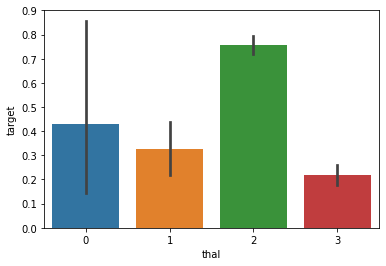

In [0]:
sns.barplot(data["thal"],y)


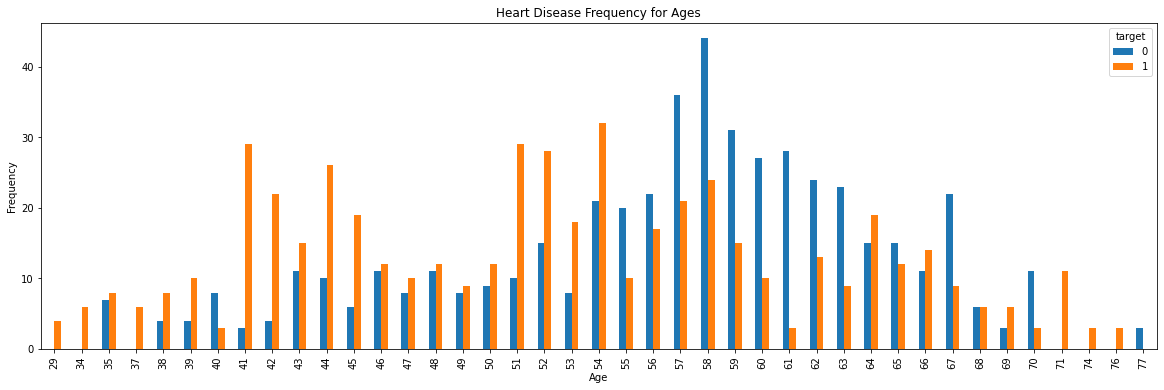

In [0]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)


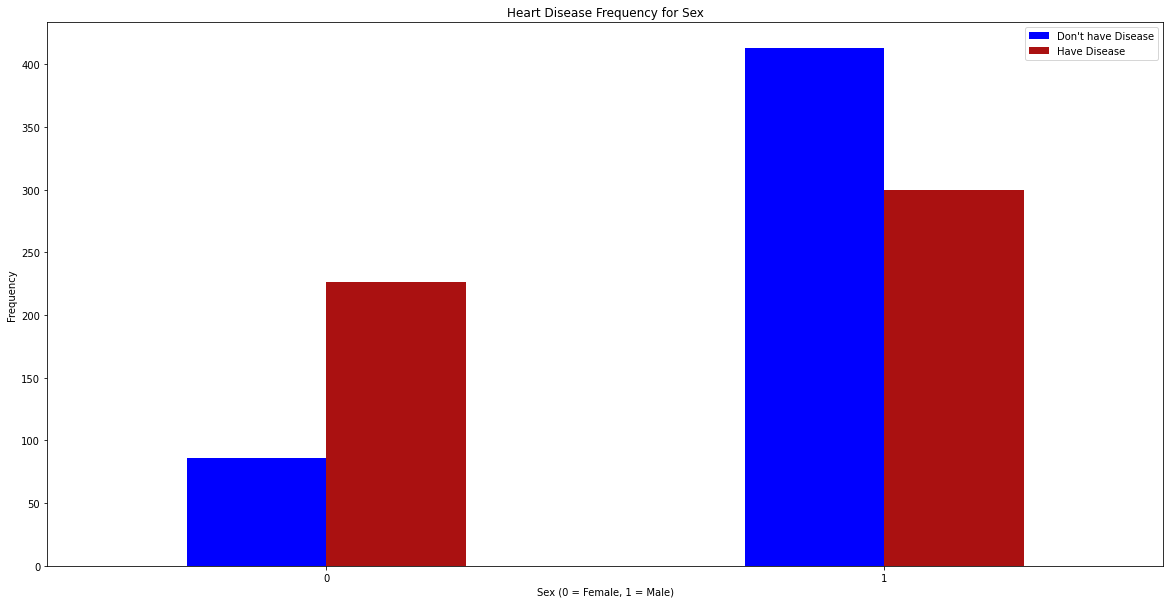

In [0]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


From the above bar chart the frequency of people who have heart disease is more in male

Heart disease according to Fasting Blood sugar


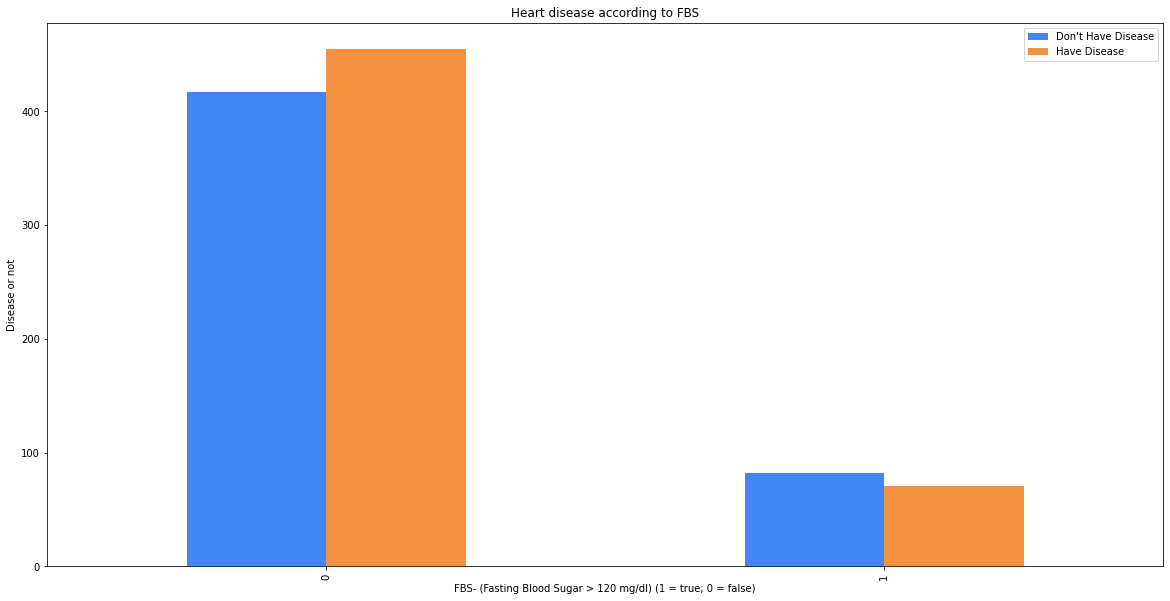

In [0]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e824ed68>,
      dtype=object)

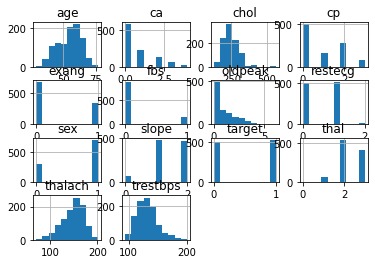

In [0]:
data.hist()

In [0]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


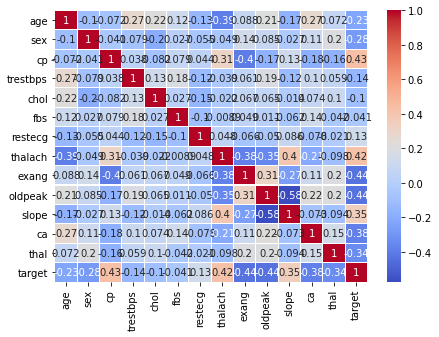

In [0]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()


Correlation plot



In [0]:
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))


Training features have 717 records and Testing features have 308 records.


In [0]:
X_train.shape

(717, 13)

In [0]:
Y_train.shape

(717,)

In [0]:
X_test.shape

(308, 13)

In [0]:
Y_test.shape

(308,)

** Importing Accuracy score**

In [0]:
from sklearn.metrics import accuracy_score


*Decision Tree modeling*

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)


[1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1]


In [0]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 84.42 %


In [0]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.971


In [0]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    tree1 = DecisionTreeClassifier(max_depth=depth,random_state = 10)
    tree1.fit(X_train,Y_train)
    train_accuracy.append(tree1.score(X_train,Y_train))
    test_accuracy.append(tree1.score(X_test,Y_test))
 

In [0]:
frame =pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.761506,0.756494
1,2,0.772664,0.701299
2,3,0.857741,0.805195
3,4,0.896792,0.834416
4,5,0.924686,0.844156


No handles with labels found to put in legend.


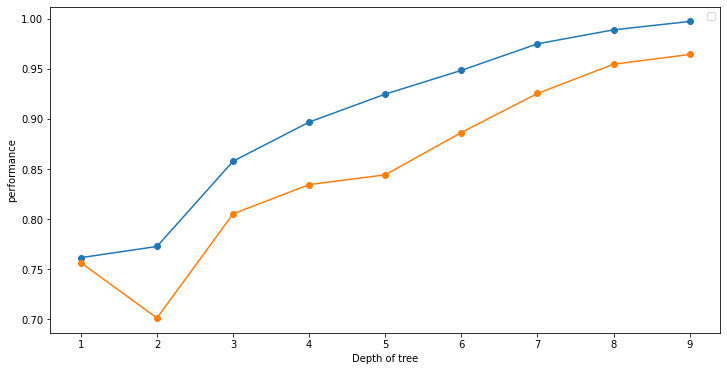

In [0]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker = 'o')
plt.plot(frame['max_depth'],frame['test_acc'],marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()


From the above plot we can observe that when max_depth=8 the performance of tree is maximum.so we select 8 as max_depth and calculate accuracy of tree again


In [0]:
tree1 = DecisionTreeClassifier(max_depth=8, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))


Accuracy on training set: 0.989
Accuracy on test set: 0.955


Decision Tree Visualization

In [0]:
df = pd.read_csv('data.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [0]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing


In [0]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())



In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


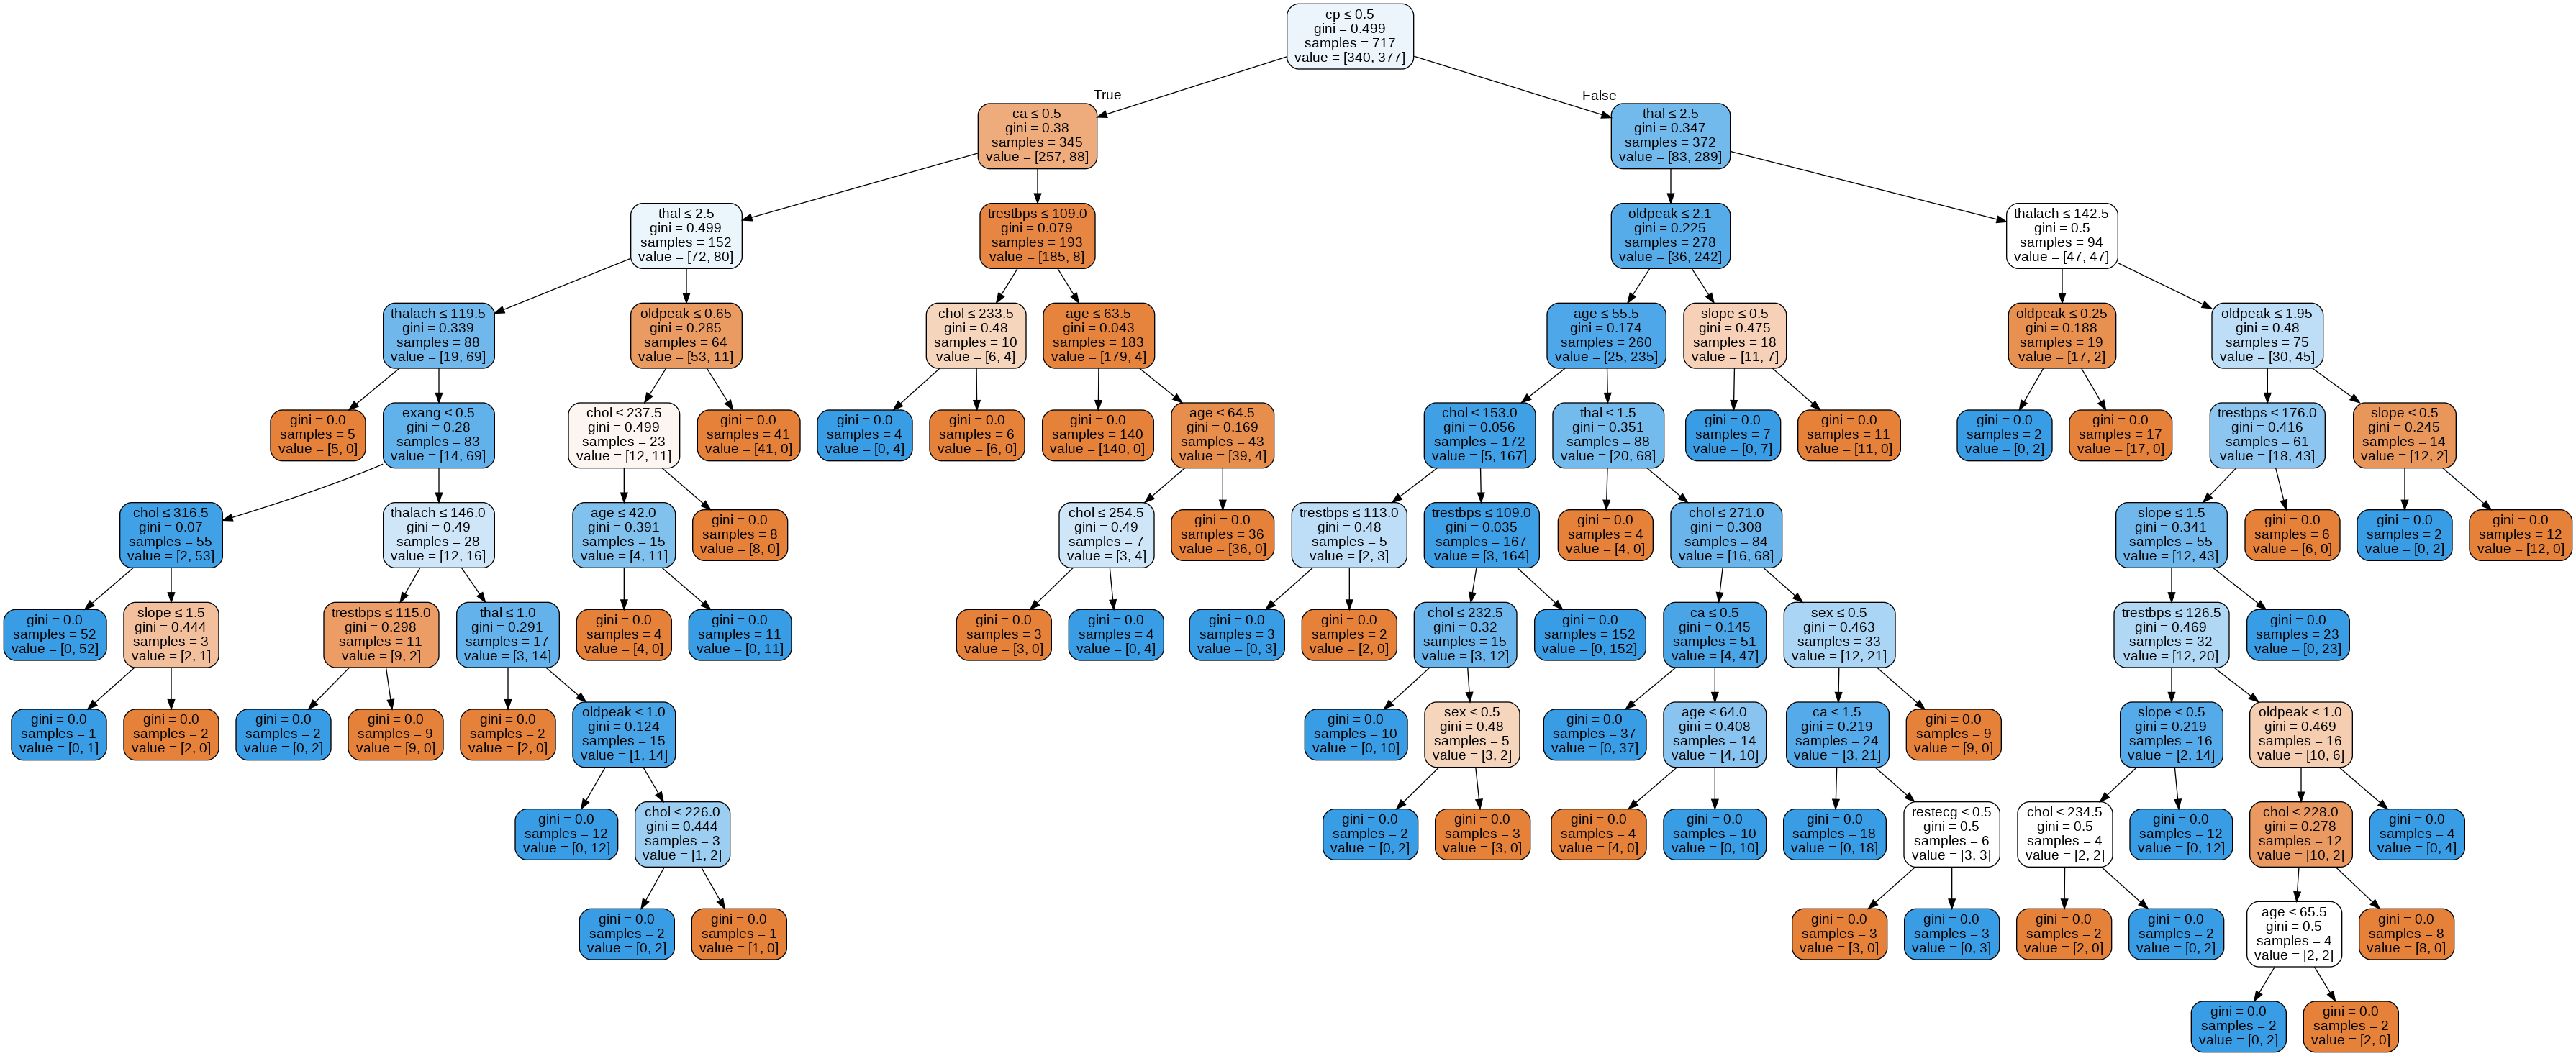

In [0]:
plot_decision_tree(clf, X_train.columns,df.columns[1])


In [0]:
from sklearn import tree
HOW_DEEP_TREES = 2
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

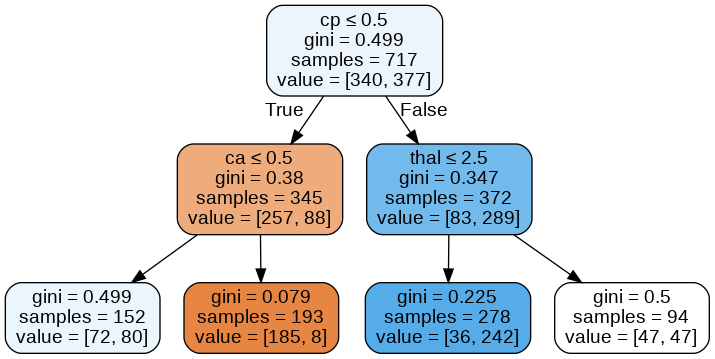

In [0]:

plot_decision_tree(clf, X_train.columns,df.columns[1])


Confusion Matrix

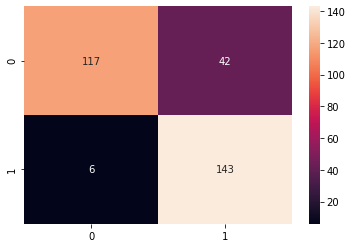

In [0]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(Y_test, y_pred_dt)

sns.heatmap(matrix,annot = True, fmt = "d")

Precision

In [0]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, y_pred_dt)

print("Precision: ",precision)


Precision:  0.772972972972973


Recall

In [0]:
from sklearn.metrics import recall_score

recall = recall_score(Y_test, y_pred_dt)

print("Recall is: ",recall)


Recall is:  0.959731543624161


F1 score

In [0]:
print((2*precision*recall)/(precision+recall))


0.8562874251497006


bad cm style¶


In [0]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM


col_0,0,1
target,,
0,117,42
1,6,143


False negative rate

In [0]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

4.026845637583893

Conclusion



 Acuuracy achived using decision tree is 85%
```

